In [ ]:
import re
import string
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Load the training data
train_path = "/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt"
train_data = pd.read_csv(train_path, sep=':::', names=['Title', 'Genre', 'Description'], engine='python')


In [ ]:
train_data.columns

Index(['Title', 'Genre', 'Description'], dtype='object')

In [ ]:
train_data.head(10)

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...
7,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all...
8,One Step Away (1985),crime,Ron Petrie (Keanu Reeves) is a troubled teen ...
9,"""Desperate Hours"" (2016)",reality-tv,"A sudden calamitous event, causing great loss..."
10,Spirits (2014/I),horror,Four high school students embark on a terrify...


In [ ]:
train_data.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [ ]:
train_data.describe()

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [ ]:
test_path = "/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data.txt"
test_data = pd.read_csv(test_path, sep=':::', names=['Id', 'Title', 'Description'], engine='python')


In [ ]:
test_data.columns

Index(['Id', 'Title', 'Description'], dtype='object')

In [ ]:
test_data.head(20)

,Id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...
5,6,Riddle Room (2016),Emily Burns is being held captive in a room w...
6,7,L'amica (1969),The beautiful but neglected wife of a brillia...
7,8,Ina Mina Dika (1989),Vasu Inamdar (Ina) suffers from a disorder wh...
8,9,Equinox Special: Britain's Tornados (2005),An insight into the tornados that hit Kensal ...
9,10,Press (2011),Press is a story of young people overwhelmed ...


In [ ]:
test_data.isnull().sum()

Id             0
Title          0
Description    0
dtype: int64

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           54200 non-null  int64 
 1   Title        54200 non-null  object
 2   Description  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [ ]:
test_data.describe()

,Id
count,54200.000000
mean,27100.500000
std,15646.336632
min,1.000000
25%,13550.750000
50%,27100.500000
75%,40650.250000
max,54200.000000


In [ ]:
# Load test data solution
test_solution_path = "/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data_solution.txt"
test_solution = pd.read_csv(test_solution_path, sep=":::", names=['Id', 'Title', 'Gener', 'Description'], engine="python")


In [ ]:
test_solution.head(10)

,Id,Title,Gener,Description
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...
5,6,Riddle Room (2016),horror,Emily Burns is being held captive in a room w...
6,7,L'amica (1969),drama,The beautiful but neglected wife of a brillia...
7,8,Ina Mina Dika (1989),comedy,Vasu Inamdar (Ina) suffers from a disorder wh...
8,9,Equinox Special: Britain's Tornados (2005),documentary,An insight into the tornados that hit Kensal ...
9,10,Press (2011),drama,Press is a story of young people overwhelmed ...


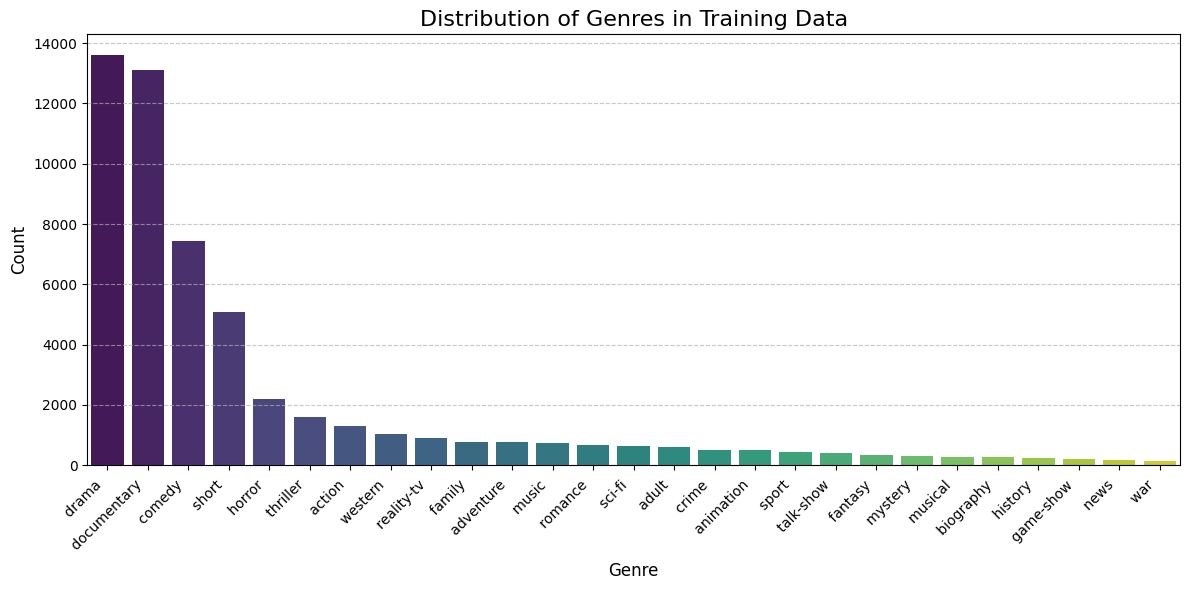

In [ ]:
genre_counts = train_data['Genre'].value_counts()
genre_counts = genre_counts.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Distribution of Genres in Training Data', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
import nltk #a powerful library for working with human language data.
from nltk.corpus import stopwords #for cleaning
from nltk.stem import LancasterStemmer ##

stemmer = LancasterStemmer()
stop_words = set(stopwords.words("english"))  # Stopwords set

def cleaning_data(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'.pic\S+', '', text)
    text = re.sub(r'[^a-zA-Z+]', ' ', text)  # Change to replace non-characters with a space
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    # Use the predefined stop_words variable instead of redefining it inside the function
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
    text = re.sub(r"\s+", " ", text).strip()  # Replace multiple spaces with a single space
    return text

train_data['clean_description'] = train_data['Description'].apply(cleaning_data)
test_data['clean_description'] = test_data['Description'].apply(cleaning_data)

In [ ]:
test_solution['clean_description'] = test_solution['Description'].apply(cleaning_data)

In [ ]:
test_data.head(20)

,Id,Title,Description,clean_description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",brane loves life car apartment job especially ...
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belongin...
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin family shepherds north tra...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father died spoken brother years serious cance...
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial arts superstar b...
5,6,Riddle Room (2016),Emily Burns is being held captive in a room w...,emily burns held captive room idea got determi...
6,7,L'amica (1969),The beautiful but neglected wife of a brillia...,beautiful neglected wife brilliant architect m...
7,8,Ina Mina Dika (1989),Vasu Inamdar (Ina) suffers from a disorder wh...,vasu inamdar ina suffers disorder sees comes d...
8,9,Equinox Special: Britain's Tornados (2005),An insight into the tornados that hit Kensal ...,insight tornados hit kensal rise birmingham su...
9,10,Press (2011),Press is a story of young people overwhelmed ...,press story young people overwhelmed social di...


In [ ]:
# Encode the target variable
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['Genre'])


In [ ]:
# Define the pipeline for SVC
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_df=0.9, ngram_range=(1, 2))),
    ('model', SVC(kernel='linear', C=1))
])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_data['clean_description'], y_train, test_size=0.2, random_state=42)


In [ ]:
# Train and evaluate the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_df=0.9, ngram_range=(1, 2))),
                ('model', SVC(C=1, kernel='linear'))])

In [ ]:
# Evaluate the model
y_train_pred = pipeline.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")

Training Accuracy: 0.9594429457471583


In [ ]:
y_test_pred = pipeline.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Validation Accuracy: {test_accuracy}")


Validation Accuracy: 0.5998339942820252


In [ ]:
# Test with the actual test data
test_descriptions = test_data['clean_description']
test_predictions = pipeline.predict(test_descriptions)
test_predictions_labels = label_encoder.inverse_transform(test_predictions)



In [ ]:
# Add predictions to test data
test_data['Predicted_Gener'] = test_predictions_labels
# Compare predictions with the actual genres from the solution
test_solution = test_solution[['Id', 'Gener']]
test_data = test_data[['Id', 'Predicted_Gener']]
comparison_df = test_data.merge(test_solution, on='Id')
comparison_df.columns = ['Id', 'Predicted_Gener', 'Actual_Gener']

# Calculate accuracy
accuracy = accuracy_score(comparison_df['Actual_Gener'], comparison_df['Predicted_Gener'])
print(f"Test Data Accuracy: {accuracy}")

Test Data Accuracy: 0.5995756457564576
